<class 'pandas.core.frame.DataFrame'>
Int64Index: 95143 entries, 0 to 96452
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Apparent Temperature (C)  95143 non-null  float64
 1   Humidity                  95143 non-null  float64
 2   Wind Speed (km/h)         95143 non-null  float64
 3   Wind Bearing (degrees)    95143 non-null  float64
 4   Visibility (km)           95143 non-null  float64
 5   Pressure (millibars)      95143 non-null  float64
dtypes: float64(6)
memory usage: 7.1 MB


In [437]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [438]:
df = pd.read_csv('weatherHistory.csv')

In [439]:
df.drop(['Daily Summary','Loud Cover','Formatted Date','Precip Type','Temperature (C)'], axis = 1 , inplace=True)

In [440]:

hum_filter =  df['Humidity'] == 0 
pre_filter =  df['Pressure (millibars)'] == 0 
df.drop(index=df[hum_filter].index,inplace=True) 
df.drop(index=df[pre_filter].index,inplace=True) 


<ipython-input-440-8b278295ce7b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(index=df[pre_filter].index,inplace=True)


In [441]:
df[  df['Humidity'] == 0   ].value_counts().count()

0

In [442]:
df[  df['Pressure (millibars)'] == 0   ].value_counts().count()

0

In [443]:
df2 = pd.DataFrame([df.Summary]).transpose()

In [444]:
df2.head()

,Summary
0,Partly Cloudy
1,Partly Cloudy
2,Mostly Cloudy
3,Partly Cloudy
4,Mostly Cloudy


In [445]:
df.drop(['Summary'], axis = 1 , inplace=True)

In [446]:
df.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51


<AxesSubplot:>

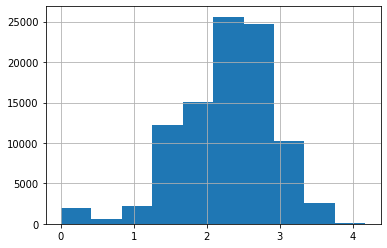

In [447]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log,validate=True)
df['Wind Speed (km/h)'] = log_transformer.transform(df[['Wind Speed (km/h)']]+1)
df['Wind Speed (km/h)'].hist()

<AxesSubplot:>

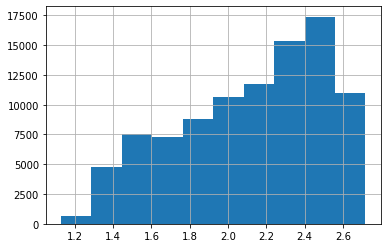

In [448]:
exponential_transformer = FunctionTransformer(np.exp)
df['Humidity'] = exponential_transformer.transform(df['Humidity'])
df['Humidity'].hist() 

In [449]:
df2['Summary'] = df2['Summary'].astype('category').cat.codes

In [450]:
df2.head()

,Summary
0,19
1,19
2,17
3,19
4,17


In [451]:
cols =['Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']
scaler = StandardScaler() 
scaler.fit(df)
X_Scaled = scaler.transform(df)
X_Scaled_Except = pd.DataFrame(X_Scaled, columns=cols)
X_Scaled_Except.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-0.327397,0.804184,0.660723,0.591761,1.300415,-0.216237
1,-0.342484,0.618167,0.675135,0.666250,1.300415,-0.151938
2,-0.141141,0.804184,-1.033068,0.154138,1.092724,-0.112072
3,-0.462666,0.437647,0.659114,0.759361,1.300415,-0.051630
4,-0.365896,0.437647,0.317152,0.666250,1.300415,-0.038770


In [452]:
merge = pd.concat([X_Scaled_Except, df2], axis=1)

In [453]:
merge.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary
0,-0.327397,0.804184,0.660723,0.591761,1.300415,-0.216237,19.0
1,-0.342484,0.618167,0.675135,0.666250,1.300415,-0.151938,19.0
2,-0.141141,0.804184,-1.033068,0.154138,1.092724,-0.112072,17.0
3,-0.462666,0.437647,0.659114,0.759361,1.300415,-0.051630,19.0
4,-0.365896,0.437647,0.317152,0.666250,1.300415,-0.038770,17.0


In [454]:
merge.isnull().sum()
merge.dropna(inplace=True)

In [455]:
merge.isnull().sum()

Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Summary                     0
dtype: int64

In [456]:
pca =PCA()
X_pca = pca.fit_transform(merge)

In [457]:
colss =['Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)','Summery_Types']
dfinal = pd.DataFrame(data=X_pca, columns=colss)

In [458]:
dfinal.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summery_Types
0,-2.913533,-0.225229,0.933818,-0.258165,-0.026542,-1.426847,-0.476690
1,-2.913708,-0.310076,0.917750,-0.358113,-0.139180,-1.364450,-0.373281
2,-0.911709,0.197428,-0.432863,-0.434052,0.914347,-1.304637,-0.071447
3,-2.912648,-0.317147,0.905611,-0.491213,-0.281813,-1.343826,-0.207947
4,-0.913384,-0.309306,0.608984,-0.522586,-0.065032,-1.337515,-0.163075


In [459]:
XLabel = dfinal[[
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)','Summery_Types']]
YLabel = dfinal['Apparent Temperature (C)']

In [460]:
pca.explained_variance_ratio_

array([0.75298019, 0.08545135, 0.04896043, 0.03790276, 0.03657895,
       0.02731691, 0.0108094 ])

In [461]:
from sklearn.model_selection import train_test_split

In [462]:
X_train, X_test, y_train, y_test = train_test_split(XLabel, YLabel, test_size=0.2, random_state=101)

In [463]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [464]:
print(lm.intercept_)

0.002039518127335214


In [465]:
coeff_df = pd.DataFrame(lm.coef_,XLabel.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Humidity,0.003849
Wind Speed (km/h),0.007178
Wind Bearing (degrees),-0.010437
Visibility (km),0.004623
Pressure (millibars),0.001180
Summery_Types,0.025568


In [466]:
predictions = lm.predict(X_test)

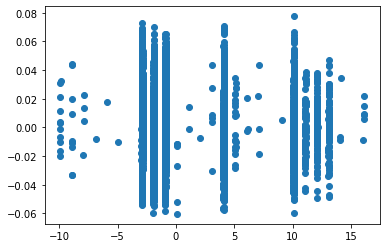

In [467]:
plt.scatter(y_test,predictions)

In [468]:
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.1501875511456063
MSE: 18.225933409974036
RMSE: 4.269184162105687
